In [1]:
from IPython.core.display import HTML
HTML("""
<style>
div.text_cell_render { /* Customize text cells */
font-family: 'Times New Roman';
font-size:1.3em;
line-height:1.4em;
padding-left:1.5em;
padding-right:1.5em;
}
</style>
""")

<h1><center>Support Vector Machines</center></h1>

<b>Support vector machine</b> is a generalization of a simple and intutive classifier called the <b>maximal margin classifier</b>. Maximal margin classifier has a limitation that it can be only applied to a data set whose classes are seperated by a linaer boundary.

### 9.1 Maximal Margin Classifier
#### 9.1.1 What Is a Hyperplane?

In a $p$-dimensional space, a <b>hyperplane</b> is a flat affine subspace of $p-1$ dimensions. In two dimensions, the hyperplane is a line and can be given as:

$$\beta_0 + \beta_1 X_1 + \beta_2 X_2 = 0$$

for parameters $\beta_0, \beta_1, \beta_2$. In a $p$ dimensional setting, the hyperplane can be given as:

$$\beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... + \beta_p X_p = 0$$

If a point $X = (X_1, X_2, ..., X_p)^T$ in the space satisfies the above equation, the point $X$ lies on the hyperplane.

If $X$ satisfies $\beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... + \beta_p X_p > 0$, $X$ lies to one side of the hyperplane. On the other hand, if $\beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... + \beta_p X_p < 0$, $X$ lies on the other side of the hyperplane. Hence, a hyperplane divides a $p$-dimensional space into <b>two halves</b>.

#### 9.1.2 Classification Using a Separating Hyperplane

Classification can be done by using the concept of seperating hyperplanes. Suppose there exists a seperating hyperplane whihc divides the data set perfectly into two classes, labeled as $y_i=1, y_i=-1$. Separating hyperplane can be defined as:

$$\beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... + \beta_p X_p > 0 \ \ if \ \ y_i= 1$$

$$\beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... + \beta_p X_p < 0 \ \ if \ \ y_i= -1$$

and can be combined as:

$$y_i(\beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... + \beta_p X_p) > 0; \forall \  i=1,2,..,n$$

If a separating hyperplane exists, it can be used to construct a classifier and an observation can be classified depending on which side of the hyperplane it is located. We can also use the <b>magnitude</b> of the distance of the observation from the hyperplane to decide the confidence of the classification. More the distance, the more is the confidence about the classification of the observation. A classifier based on a separating hyperplane leads to a <b>linear decision boundary</b>.

#### 9.1.3 The Maximal Margin Classifier

If the data set can be separated by a separating hyperplane, an infinity number of such hyperplanes exist. Hence, we need to devise a way to select which of the infinite possible hyperplanes to use.

A natural choice is the <b>maximal margin classifier</b> (also called as <b>optimal separating hyperplane</b>). It is the hyperplane which is farthest from the training observations. <b>Margin</b> is the smallest amongst the perpendicular distance of all the observations from the hyperplane. Maximal margin classifier is the hyperplane for which the <b>margin is maximum</b>. Maximal margin classifiers are often successful but they can lead to <b>overfitting</b> for large values of $p$.

<b>Support vectors</b> are the observations which are on the width of the classifier. If these points are moved, the maximal margin hyperplane will move as well, as these are the points which decide the end of the regions (margin) around the maximal margin classifier. Maximal margin hyperplane depends only on the support vectors. Displacement of other observations does not affect the maximal margin hyperplane, until and unless the observation crosses the boundary set by the margin.

#### 9.1.4 Construction of the Maximal Margin Classifier

Given a set of $n$ training observations $x_1, x_2, ..., x_n$ in a $p$-dimensional space having the class labels $y_1, y_2, ..., y_n \in \{-1, 1\}$, maximal margin hyperplane is the solution of the optimization problem:

$$maximize_{\beta_0, \beta_1, ..., \beta_p} M$$

$$subject \ to \ \sum_{j=1}^{p} \beta_j^2 = 1,$$
$$y_i(\beta_0 + \beta_1 X_{i1} + \beta_2 X_{i2} + ... + \beta_p X_{ip}) \geq M; \forall \  i=1,2,..,n$$

The second condition simply ensures that all the observations are on or beyond the margin $M$, given $M$ is positive, and on the correct side of the classification. Due to the first constraint, the perpendicular distance from the $i$th observation to the hyperplane is given by $y_i(\beta_0 + \beta_1 X_{i1} + \beta_2 X_{i2} + ... + \beta_p X_{ip})$. Hence, $M$ represents the <b>margin</b> of the hyperplane and the optimization problem chooses $\beta_0, \beta_1, ..., \beta_p$ that maximizes $M$.

#### 9.1.5 The Non-separable Case

Maximal margin classifier can be obtained if and only if the seperating hyperplane exists. The generalization of the maximal margin classifier to accomodate the <b>non-separable</b> classes is known as the <b>support vector classifier</b>.

### 9.2 Support Vector Classifiers

#### 9.2.1 Overview of the Support Vector Classifier

The maximal margin classifiers can be sensitive to individual observations. Sometimes, adding a single observation in the data set, can lead to dramatic change in the separating hyperplane. The sensitivity and the low margin for a maximal margin classifier may suggest that the maximal margin classifier has <b>overfit</b> the training data. So, sometimes we may be willing to consider a classifier based on a hyperplane that does not perfectly separate the two classes, and hence, will be <b>more robust (or less sensitive to individual observations)</b> and will give better results for the unseen data points.

<b>Support vector classifiers (soft margin classifiers)</b> misclassify a few observations for the sake of robustness and better results. In a soft margin classifier, some of the observations can lie on the wrong side of the margin or even on the wrong side of the hyperplane. Observations that are on the wrong side of the hyperplane are misclassified by the support vector classifier.

#### 9.2.2 Details of the Support Vector Classifier

Support vector classifier is the solution of the optimization problem which is given as:

$$maximize_{\beta_0, \beta_1, ..., \beta_p, \epsilon_1, \epsilon_2, ..., \epsilon_n} M$$

$$subject \ to \ \sum_{j=1}^{p} \beta_j^2 = 1,$$
$$y_i(\beta_0 + \beta_1 X_{i1} + \beta_2 X_{i2} + ... + \beta_p X_{ip}) \geq M(1 - \epsilon_i); \forall \  i=1,2,..,n,$$
$$\epsilon_i \geq 0, \ \sum_{i=1}^{n}\epsilon_i \leq C$$

where $C$ is a non-negative tuning parameter. Here $\epsilon_1, ..., \epsilon_n$ are <b>slack variables</b> and allow individual observations to be on the wrong side of the margin or the hyperplane. For a test observation $x^*$, we simply classify it based on the sign of $f(x^*) = \beta_0 + \beta_1 x_1^* + ... + \beta_p x_p^*$.

The slack variable $\epsilon_i$ depicts the location of $i$th observation relative to the margin and the hyperplane. If $\epsilon_i = 0$, the observation <b>lies on the correct side of the margin</b>. If $\epsilon_i > 0$, the observation is on the <b>wrong side of the margin</b> and if $\epsilon_i > 1$, the observation is on the <b>wrong side of the hyperplane</b>.

The hyperparamter $C$ amounts for the budget for the amount by which the margin can be violated by $n$ observations. If $C=0$, there is no budget for the violation of the margin and hence the support vector classifier turns into maximal margin classifier. For $C>0$, no more than $C$ observations can be on the wrong side of the hyperplane (as $\epsilon_i > 1$ for the observation to be on the wrong side of the hyperplane). If $C$ increases, the margin will widen and if it decreases, the margin will become narrow. $C$ is chosen via <b>cross-validation</b>. When $C$ is <b>small</b>, the margin narrows and hence the classifier fits more colsely to the data, giving a <b>high variance</b>. For <b>larger</b> $C$, the margin is wider and hence fitting the data less hard and obtaining a classifier whihc is <b>more biased</b> but have <b>low variance</b>.

The observations that lie on the correct side of the margin do not affect the hyperplane. The observations that either lie on the margin or that violate the margin affect the hyperplane and hence are known as <b>support vectors</b>. For larger value of $C$, we will get a more number of support vectors and hence the hyperplane will depend on large number of observations, making the model low in variance.

### 9.3 Support Vector Machines

#### 9.3.1 Classification with Non-linear Decision Boundaries

Support vector classifiers, which are designed to work in the setting of linear decision boundary, can be extended to handle the case of non-linear decision boundary by enlarging the feature space using polynomial transformation of the predictors. For example, if we have a $p$-dimensional feature space given as: $X_1, X_2, ..., X_p$, we could instead fit a support vector classifier using $2p$ features: $X_1, X_1^2, X_2, X_2^2, ..., X_p, X_p^2$. In the transformed feature space, the decision boundary is still linear, but if we consider the original feature space, the decison boundary will be non-linear. There are many ways to enlarge the feature space, such as using higher order polynomials or using interaction terms.

#### 9.3.2 The Support Vector Machine

The <b>support vector machine(SVM)</b> is an extension of support vector classifier by enlarging the feature space using <b>kernels</b>. For obtaining the solution of the support vector classifier problem, we only need to have the <b>inner products</b> of the observations. The inner product of the observations $x_i$ and $x_{i^{'}}$ is given as:

$$\langle x_i, x_{i^{'}} \rangle = \sum_{j=1}^{p} x_{ij} x_{i^{'}j}$$

Linear support vector classifier can be represented as:

$$f(x) = \beta_0 + \sum_{i=1}^{n} \alpha_i \langle x, x_i \rangle$$

where $\alpha_i$s are a total of $n$ parameters, one per training observation. To estimate the parameters $\beta_0, \alpha_1, ..., \alpha_n$, we need to compute ${n}\choose{2}$ inner products for each combination of training observation. It turns out that if the training observation is <b>not a support vector</b>, the $\alpha_i$ is 0. Hence, $\alpha_i$s are non-zero only for support vectors. Hence, the solution can be rewritten in the form

$$f(x) = \beta_0 + \sum_{i \in S} \alpha_i \langle x, x_i \rangle$$

where $S$ is the set containing the indices of the support vectors. 

A <b>kernel</b> is a function that <b>quantifies the similarity of two observations</b>. Inner product can be considered as a kernel and hence can be represented as:

$$K(x_i, x_{i^{'}}) = \sum_{j=1}^{p} x_{ij} x_{i^{'}j}$$

The above equation is a <b>linear kernel</b> as the support vector classifiers are linear in features. Linear kernel quantifies the similarity of a pair of observation using <b>Pearson (standard) correlation</b>. A kernel of the form:

$$K(x_i, x_{i^{'}}) = \bigg(1 + \sum_{j=1}^{p} x_{ij} x_{i^{'}j} \bigg)^d$$

is called as <b>polynomial kernel</b> of degree $d$. Using polynomial kernel in a support vector classifier leads to a much more flexible decision boundary. When a support vector classifier is combined with a non-linear kernal it is known as <b>support vector machine</b>. In this case, the function has the form:

$$f(x) = \beta_0 + \sum_{i \in S} \alpha_i K(x, x_{i})$$

Apart from polynomial kernel, another popular choice for non-linear kernel is <b>radial kernel</b>, which is given as:

$$K(x_i, x_{i^{'}}) = exp \bigg( - \gamma \sum_{j=1}^{p} (x_{ij} - x_{i^{'}j})^2 \bigg)$$

where $\gamma$ is a positive constant. The intution behind working of radial kernel is as follows:

<b><center>For the training observations which are far from the given test observation $x^*$, the Euclidean distance will be large and hence the overall value of $K(x^*, x_i)$ will be small and hence $x_i$ will play virtually no role in $f(x^*)$. In other words, training observations that are far from $x^*$ will play almost no role in the predicted class label for $x^*$ and hence the radial kernel shows a local behaviour.</center></b>

One advantage of using kernel instead of using enlarged feature space is the less computational complexity as we just need to compute ${n} \choose {2} $ values of $K(x_i, x_{i^{'}})$.

### 9.4 SVMs with More than Two Classes

SVM can be extended for more than two classes by the methods: <b>one-versus-one</b> and <b>one-versus-all</b>.

#### 9.4.1 One-Versus-One Classification

A <b>one-versus-one</b> or <b>all-pairs</b> classification process builds ${K} \choose {2}$ SVMs, each of which compares a pair of classes. A test observation is classified using each of the ${K} \choose {2}$ classifiers. The final classification is done by assigning the test observation to the class it was most frequently assigned by all of these ${K} \choose {2}$ classifiers.

#### 9.4.2 One-Versus-All Classification

In <b>one-versus-all</b> approach, $K$ SVMs are fit, each time comparing one of the $K$ classes to remaining $K-1$ classes. The test observation is assigned to the class for which the value of $f(x^*)$ is the largest. 

### 9.7 Exercises

#### Conceptual

Q1. This problem involves hyperplanes in two dimensions.

(a) Sketch the hyperplane 1 + 3X1 − X2 = 0. Indicate the set of points for which 1 + 3X1 − X2 > 0, as well as the set of points for which 1 + 3X1 − X2 < 0.

(b) On the same plot, sketch the hyperplane −2 + X1 + 2X2 = 0. Indicate the set of points for which −2+ X1 +2X2 > 0, as well as the set of points for which −2+ X1 + 2X2 < 0.

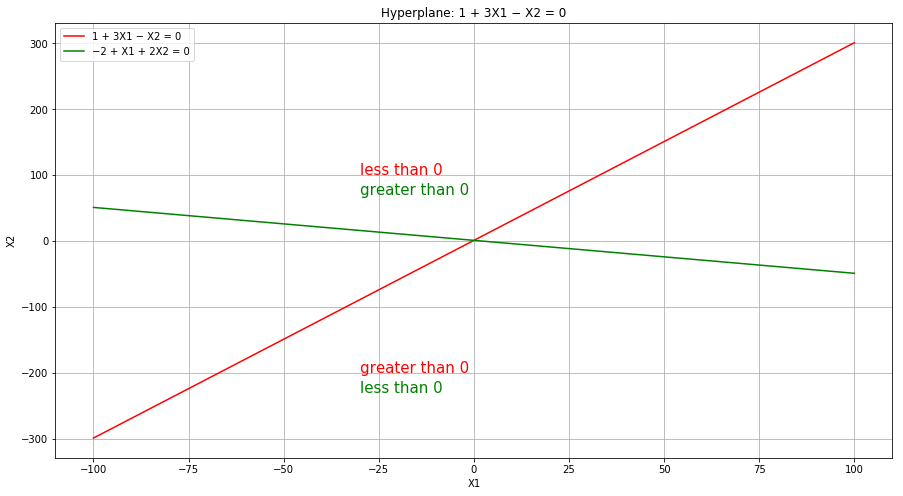

In [48]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)

x = np.linspace(-100, 100, 10000)
plt.plot(x, (1+3*x), color='r', label="1 + 3X1 − X2 = 0")
plt.text(-30, 100, "less than 0", fontdict={'color':'r', 'size':15})
plt.text(-30, -200, "greater than 0", fontdict={'color':'r', 'size':15})

plt.plot(x, (2-x)/2, color='g', label="−2 + X1 + 2X2 = 0")
plt.text(-30, 70, "greater than 0", fontdict={'color':'g', 'size':15})
plt.text(-30, -230, "less than 0", fontdict={'color':'g', 'size':15})

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_title('Hyperplane: 1 + 3X1 − X2 = 0')

plt.grid()
plt.legend()
plt.show()

Q2. We have seen that in p = 2 dimensions, a linear decision boundary takes the form $\beta_0 + \beta_1 X_1 + \beta_2 X_2 = 0$. We now investigate a non-linear decision boundary.

(a) Sketch the curve $(1+ X_1)^2 + (2- X_2)^2 = 4$.

(b) On your sketch, indicate the set of points for which $(1+ X_1)^2 + (2- X_2)^2 > 4$, as well as the set of points for which $(1+ X_1)^2 + (2- X_2)^2 \leq 4$.

(c) Suppose that a classifier assigns an observation to the blue class if $(1+ X_1)^2 + (2- X_2)^2 > 4$,
and to the red class otherwise. To what class is the observation (0, 0) classified? (−1, 1)? (2, 2)? (3, 8)?

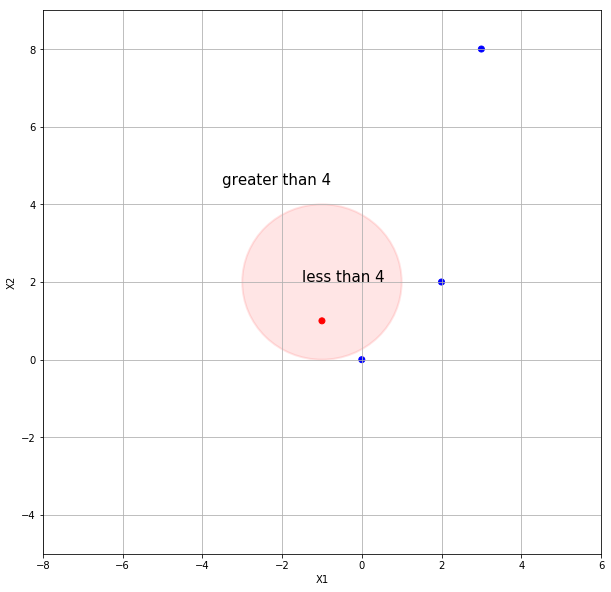

In [92]:
circle = plt.Circle((-1, 2), radius=2, facecolor='r', alpha=0.1, edgecolor='r', linewidth=2.0)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.add_artist(circle)
plt.text(-1.5, 2, "less than 4", fontdict={'color':'black', 'size':15})
plt.text(-3.5, 4.5, "greater than 4", fontdict={'color':'black', 'size':15})
plt.scatter([0, -1, 2, 3], [0, 1, 2, 8], c=['b', 'r', 'b', 'b'])

ax.set_xlim(-8, 6)
ax.set_ylim(-5, 9)
ax.set_xlabel('X1')
ax.set_ylabel('X2')

plt.grid()
plt.show()

(d) Argue that while the decision boundary in (c) is not linear in terms of $X_1$ and $X_2$, it is linear in terms of $X_1, X_2, X_1^2$ and $X_2^2$.

<b>Sol:</b> Expanding the above equation, we get

$$X_1^2 + X_2^2 + 2X_1 - 4X_2 = -1$$

which is linear in terms of $X_1, X_2, X_1^2$ and $X_2^2$.

Q3. Here we explore the maximal margin classifier on a toy data set.

(a) We are given n = 7 observations in p = 2 dimensions. For each observation, there is an associated class label. Sketch the observations.

(b) Sketch the optimal separating hyperplane, and provide the equation for this hyperplane (of the form (9.1)).

<b>Sol:</b> The optimal separating hyperplane with margins is shown below.

(c) Describe the classification rule for the maximal margin classifier. It should be something along the lines of “Classify to Red if $\beta_0 + \beta_1 X_1 + \beta_2 X_2 > 0$, and classify to Blue otherwise.” Provide the values for $\beta_0, \beta_1, \beta_2$.

<b>Sol:</b> The decision boundary is given as:

$$0.99970703 -1.99941406 X_1 +  1.99941406 X_2 = 0$$

The classification rule is: Classify to Red if < 0 and Blue otherwise.

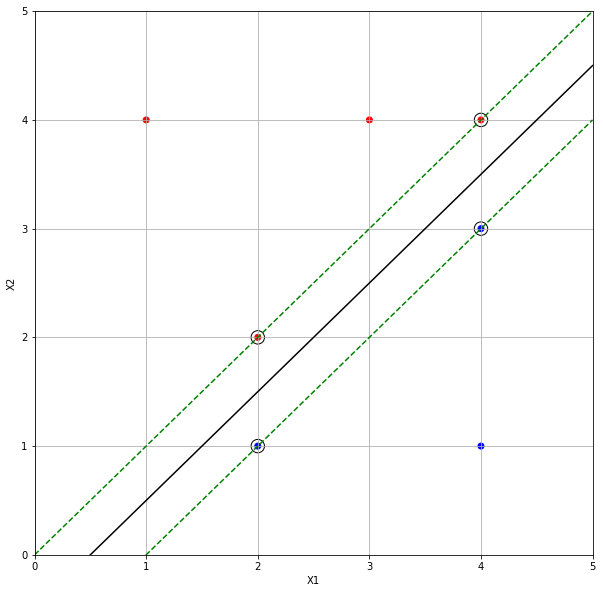

In [265]:
from sklearn import svm

X = [[3, 2, 4, 1, 2, 4, 4], [4, 2, 4, 4, 1, 3, 1]]
Y = ['r', 'r', 'r', 'r', 'b', 'b', 'b']

# fit the model
clf = svm.SVC(kernel='linear', C=100)
clf.fit(np.array(X).T.tolist(), Y)

# get the separating hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(0, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]

# plot the parallels to the separating hyperplane that pass through the
# support vectors
b = clf.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = clf.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=180, facecolors='none', edgecolors='black')
plt.scatter(X[0], X[1], c=['r', 'r', 'r', 'r', 'b', 'b', 'b'])
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--', color='g')
plt.plot(xx, yy_up, 'k--', color='g')

ax.set_xlim(0, 5)
ax.set_ylim(0, 5)
ax.set_xlabel('X1')
ax.set_ylabel('X2')

plt.grid()
plt.show()

#### Applied

Q4. Generate a simulated two-class data set with 100 observations and two features in which there is a visible but non-linear separation between the two classes. Show that in this setting, a support vector machine with a polynomial kernel (with degree greater than 1) or a radial kernel will outperform a support vector classifier on the training
data. Which technique performs best on the test data? Make plots and report training and test error rates in order to back up your assertions.

<b>Sol:</b> The plots with decision boundary and various error rates are shown below.

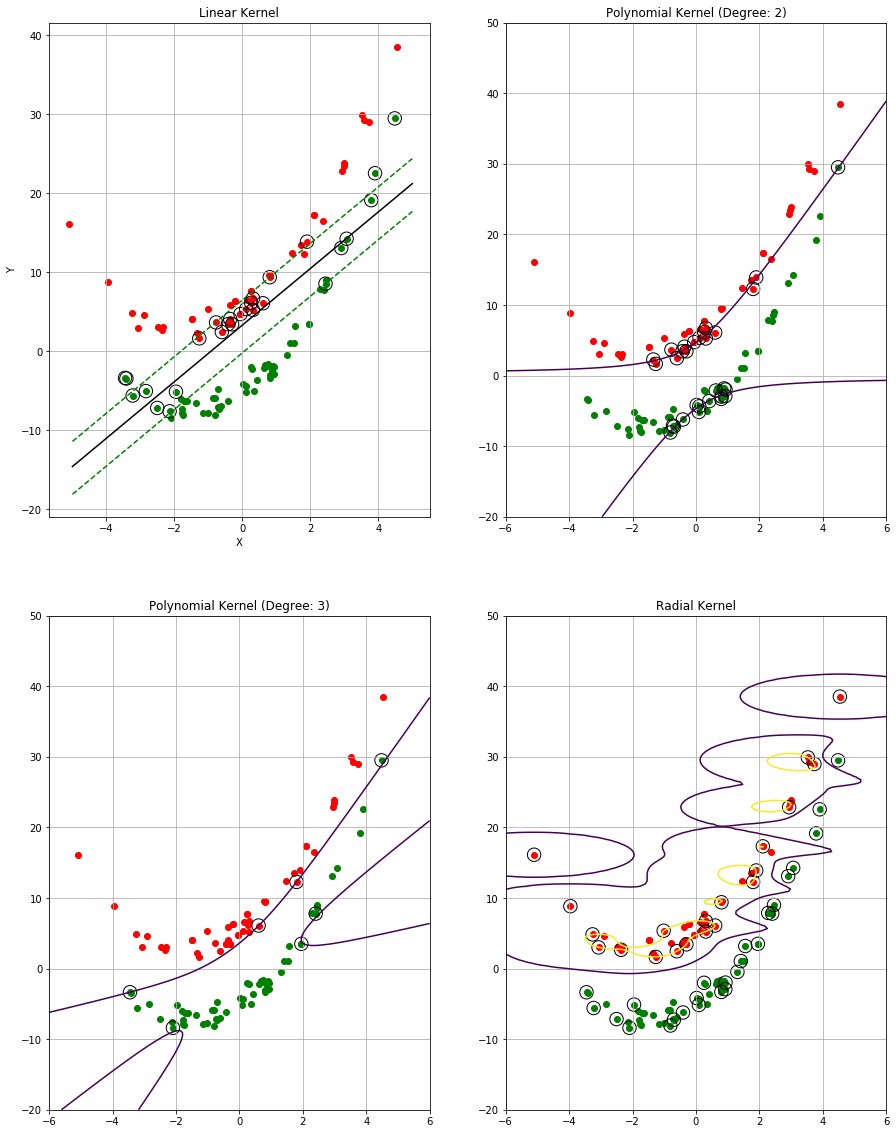

In [266]:
import numpy as np
from sklearn.model_selection import train_test_split

np.random.seed(0)
X = np.random.normal(0, 2, 100)
Y = X**2 + 3*X + np.random.normal(0, 1, 100)

c = list(range(0, 100))
c1 = np.random.randint(0, 100, size=50, dtype='l')
c2 = [x for x in c if x not in c1]
Y[c1] = Y[c1] + 5
Y[c2] = Y[c2] - 5

labels = np.asarray([1]*100)
labels[c2] = labels[c2] -2

M = np.column_stack((X,Y))

X_train, X_test, y_train, y_test = train_test_split(M, labels, test_size=0.1)

# fit the linear model
clf = svm.SVC(kernel='linear', C=10000)
clf.fit(X_train, y_train)

# get the separating hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]

# plot the parallels to the separating hyperplane that pass through the
# support vectors
b = clf.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = clf.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])


fig = plt.figure(figsize=(15, 20))
ax = fig.add_subplot(221)

plt.scatter(X[c2], Y[c2], color='g')
plt.scatter(X[c1], Y[c1], color='r')
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=180, facecolors='none', edgecolors='black')
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--', color='g')
plt.plot(xx, yy_up, 'k--', color='g')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.grid()
ax.set_title("Linear Kernel")

#fit polynomial model
clf_poly = svm.SVC(kernel='poly', degree=2, C=1000)
clf_poly.fit(X_train, y_train)

x_min = -6
x_max = 6
y_min = -20
y_max = 50

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = clf_poly.decision_function(np.c_[XX.ravel(), YY.ravel()])

# Put the result into a color plot
Z = Z.reshape(XX.shape)
ax = fig.add_subplot(222)

plt.scatter(X[c2], Y[c2], color='g')
plt.scatter(X[c1], Y[c1], color='r')
plt.scatter(clf_poly.support_vectors_[:, 0], clf_poly.support_vectors_[:, 1],
            s=180, facecolors='none', edgecolors='black')

plt.contour(XX, YY, Z, levels=[0])
ax.grid()
ax.set_title("Polynomial Kernel (Degree: 2)")

#fit polynomial model: degree 3
clf_poly_3 = svm.SVC(kernel='poly', degree=3, C=1000)
clf_poly_3.fit(X_train, y_train)

x_min = -6
x_max = 6
y_min = -20
y_max = 50

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = clf_poly_3.decision_function(np.c_[XX.ravel(), YY.ravel()])
p_poly = clf_poly.predict(M)

# Put the result into a color plot
Z = Z.reshape(XX.shape)
ax = fig.add_subplot(223)

plt.scatter(X[c2], Y[c2], color='g')
plt.scatter(X[c1], Y[c1], color='r')
plt.scatter(clf_poly_3.support_vectors_[:, 0], clf_poly_3.support_vectors_[:, 1],
            s=180, facecolors='none', edgecolors='black')

plt.contour(XX, YY, Z, levels=[0])
ax.grid()
ax.set_title("Polynomial Kernel (Degree: 3)")

#fit radial kernel
clf_radial = svm.SVC(kernel='rbf', C=1000)
clf_radial.fit(X_train, y_train)

Z = clf_radial.decision_function(np.c_[XX.ravel(), YY.ravel()])

# Put the result into a color plot
Z = Z.reshape(XX.shape)
ax = fig.add_subplot(224)

plt.scatter(X[c2], Y[c2], color='g')
plt.scatter(X[c1], Y[c1], color='r')
plt.scatter(clf_radial.support_vectors_[:, 0], clf_radial.support_vectors_[:, 1],
            s=180, facecolors='none', edgecolors='black')


plt.contour(XX, YY, Z, levels=[0, 1])
ax.grid()
ax.set_title("Radial Kernel")

plt.show()

In [267]:
print("Training miss classification for linear kernel: " 
      + str((len(X_train) - sum(y_train == clf.predict(X_train)))*100/len(X_train)))

print("Training miss classification for polynomial kernel (degree 2): " 
      + str((len(X_train) - sum(y_train == clf_poly.predict(X_train)))*100/len(X_train)))

print("Training miss classification for polynomial kernel (degree 3): " 
      + str((len(X_train) - sum(y_train == clf_poly_3.predict(X_train)))*100/len(X_train)))

print("Training miss classification for radial kernel: " 
      + str((len(X_train) - sum(y_train == clf_radial.predict(X_train)))*100/len(X_train)))

print("Test miss classification for linear kernel: " 
      + str((len(X_test) - sum(y_test == clf.predict(X_test)))*100/len(X_test)))

print("Test miss classification for polynomial kernel (degree 2): " 
      + str((len(X_test) - sum(y_test == clf_poly.predict(X_test)))*100/len(X_test)))

print("Test miss classification for polynomial kernel (degree 3): " 
      + str((len(X_test) - sum(y_test == clf_poly_3.predict(X_test)))*100/len(X_test)))

print("Test miss classification for radial kernel: " 
      + str((len(X_test) - sum(y_test == clf_radial.predict(X_test)))*100/len(X_test)))

Training miss classification for linear kernel: 7.777777777777778
Training miss classification for polynomial kernel (degree 2): 16.666666666666668
Training miss classification for polynomial kernel (degree 3): 1.1111111111111112
Training miss classification for radial kernel: 0.0
Test miss classification for linear kernel: 0.0
Test miss classification for polynomial kernel (degree 2): 10.0
Test miss classification for polynomial kernel (degree 3): 0.0
Test miss classification for radial kernel: 0.0


Q5. We have seen that we can fit an SVM with a non-linear kernel in order to perform classification using a non-linear decision boundary.We will now see that we can also obtain a non-linear decision boundary by performing logistic regression using non-linear transformations of the features.

(a) Generate a data set with n = 500 and p = 2, such that the observations belong to two classes with a quadratic decision boundary between them.

(b) Plot the observations, colored according to their class labels. Your plot should display X1 on the x-axis, and X2 on the yaxis.

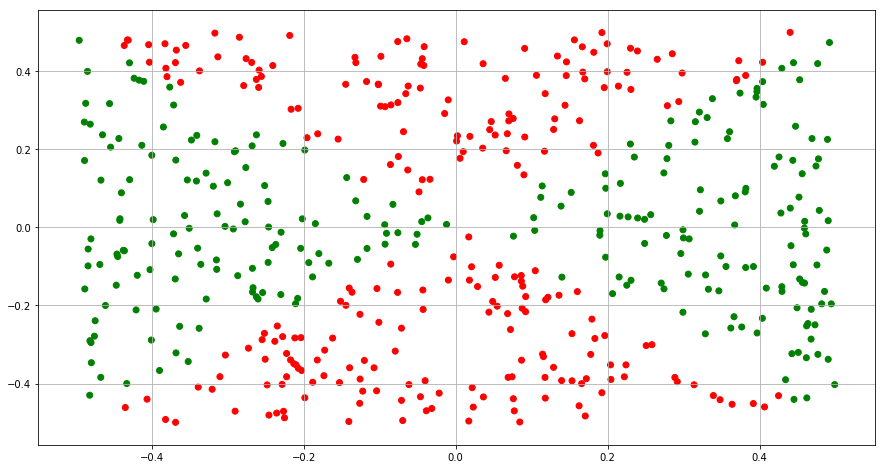

In [286]:
import matplotlib

np.random.seed(0)
X1 = np.random.uniform(0, 1, 500) - 0.5
X2 = np.random.uniform(0, 1, 500) - 0.5
Y = ((X1**2 - X2**2) > 0).astype(int)
color= ['red' if l == 0 else 'green' for l in Y]

fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111)

plt.scatter(X1, X2, color=color)
plt.grid()
plt.show()

(c) Fit a logistic regression model to the data, using X1 and X2 as predictors.

(d) Apply this model to the training data in order to obtain a predicted class label for each training observation. Plot the observations, colored according to the predicted class labels. The decision boundary should be linear.

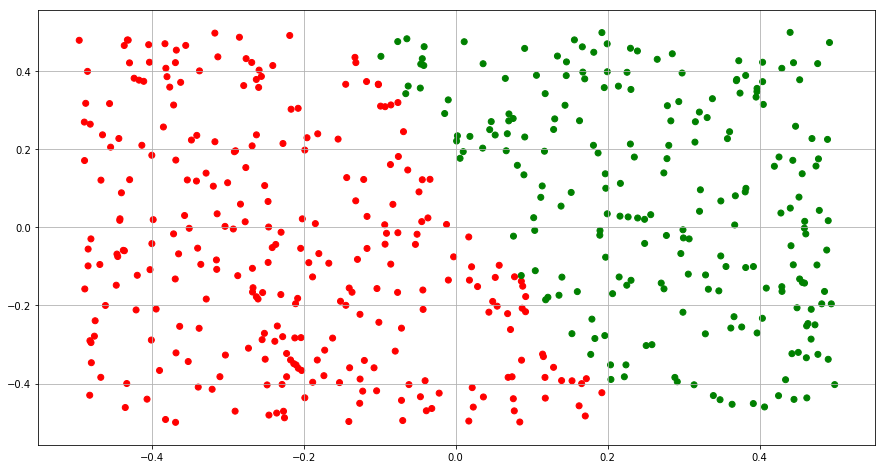

In [291]:
from sklearn.linear_model import LogisticRegression

X = np.column_stack((X1,X2))
clf = LogisticRegression(random_state=0, fit_intercept=True)
clf.fit(X, Y)
Y_train = clf.predict(X)

color= ['red' if l == 0 else 'green' for l in Y_train]

fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111)

plt.scatter(X1, X2, color=color)
plt.grid()
plt.show()

(e) Now fit a logistic regression model to the data using non-linear functions of X1 and X2 as predictors.

(f) Apply this model to the training data in order to obtain a predicted class label for each training observation. Plot the observations, colored according to the predicted class labels. The decision boundary should be obviously non-linear. If it is not, then repeat (a)-(e) until you come up with an example in which the predicted class labels are obviously non-linear.

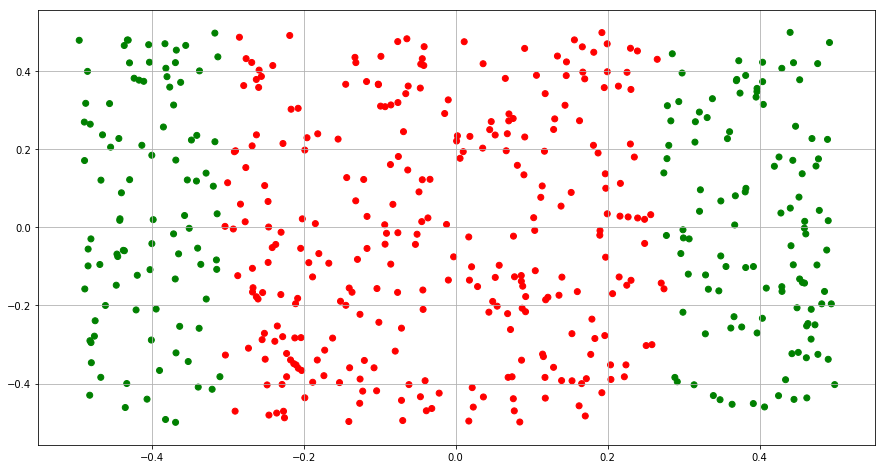

In [296]:
X1_2 = X1**2
X2_2 = X1**2

X = np.column_stack((X1,X2,X1_2,X2_2))
clf = LogisticRegression(random_state=0, fit_intercept=True)
clf.fit(X, Y)
Y_train = clf.predict(X)

color= ['red' if l == 0 else 'green' for l in Y_train]

fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111)

plt.scatter(X1, X2, color=color)
plt.grid()
plt.show()

(g) Fit a support vector classifier to the data with X1 and X2 as predictors. Obtain a class prediction for each training observation. Plot the observations, colored according to the predicted class labels.

Text(0.5,1,'Linear Kernel')

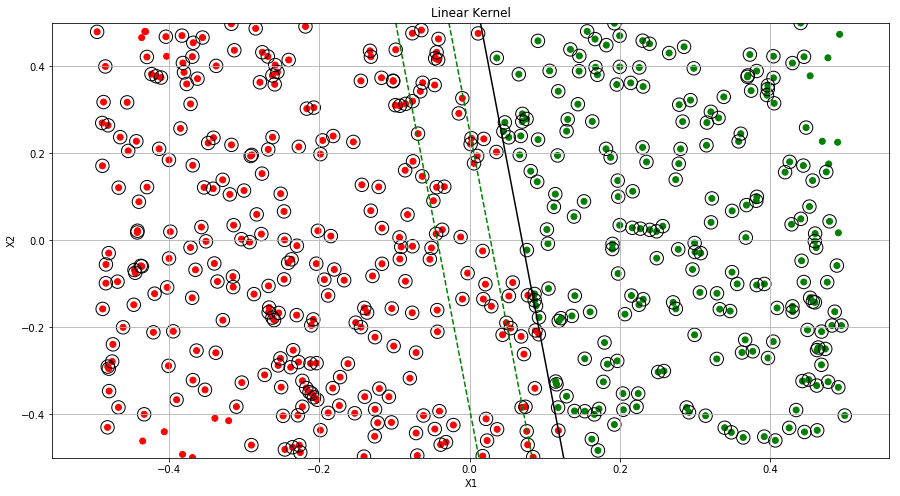

In [313]:
X = np.column_stack((X1,X2))
# fit the linear model
clf = svm.SVC(kernel='linear', C=100)
clf.fit(X, Y)
Y_train = clf.predict(X)
color= ['red' if l == 0 else 'green' for l in Y_train]

# get the separating hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-0.5, 0.5)
yy = a * xx - (clf.intercept_[0]) / w[1]

# plot the parallels to the separating hyperplane that pass through the
# support vectors
b = clf.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = clf.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111)

plt.scatter(X1, X2, color=color)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=180, facecolors='none', edgecolors='black')
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--', color='g')
plt.plot(xx, yy_up, 'k--', color='g')

ax.set_ylim(-0.5, 0.5)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.grid()
ax.set_title("Linear Kernel")


(h) Fit a SVM using a non-linear kernel to the data. Obtain a class prediction for each training observation. Plot the observations, colored according to the predicted class labels.

Text(0.5,1,'Polynomial Kernel (Degree: 2)')

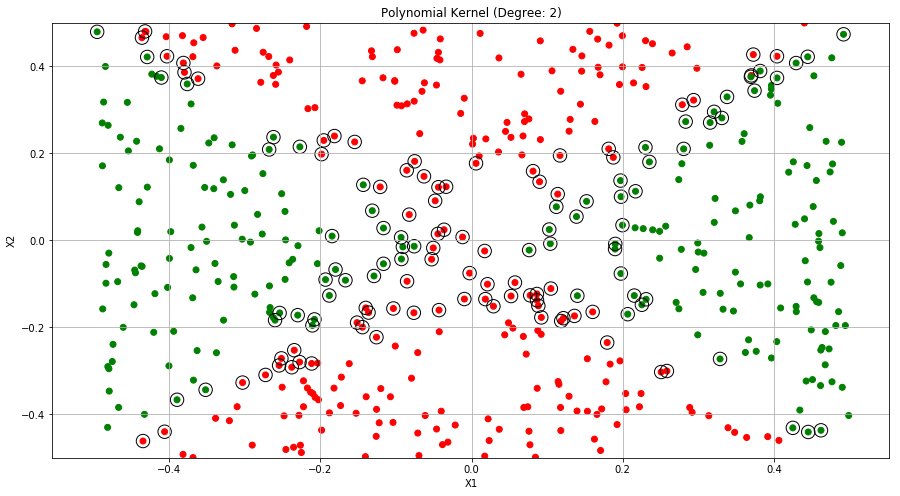

In [320]:
X = np.column_stack((X1,X2))
# fit the linear model
clf = svm.SVC(kernel='poly', degree=2, C=100)
clf.fit(X, Y)
Y_train = clf.predict(X)
color= ['red' if l == 0 else 'green' for l in Y_train]

fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111)

plt.scatter(X1, X2, color=color)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=180, facecolors='none', edgecolors='black')

ax.set_ylim(-0.5, 0.5)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.grid()
ax.set_title("Polynomial Kernel (Degree: 2)")

Q6. At the end of Section 9.6.1, it is claimed that in the case of data that is just barely linearly separable, a support vector classifier with a small value of cost that misclassifies a couple of training observations may perform better on test data than one with a huge value of cost that does not misclassify any training observations. You will now investigate this claim.

(a) Generate two-class data with p = 2 in such a way that the classes are just barely linearly separable.

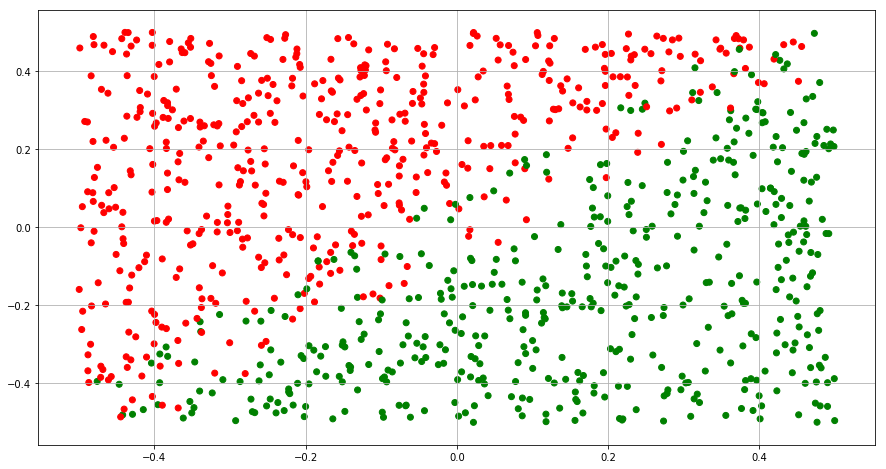

In [363]:
np.random.seed(0)
X1 = np.random.uniform(0, 1, 1000) - 0.5
X2 = np.random.uniform(0, 1, 1000) - 0.5
X = np.column_stack((X1,X2))

temp = X1-X2
Y = [None] * len(temp)
# Assign class labels
for idx, j in enumerate(temp):
    if j > 0.1:
        Y[idx] = 1
    elif j <  -0.1:
        Y[idx] = 0
    else:
        Y[idx] = np.random.uniform(0, 1) > 0.5
        
color= ['red' if l == 0 else 'green' for l in Y]

fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111)

plt.scatter(X1, X2, color=color)
plt.grid()
plt.show()

(b) Compute the cross-validation error rates for support vector classifiers with a range of cost values. How many training errors are misclassified for each value of cost considered, and how does this relate to the cross-validation errors obtained?

(c) Generate an appropriate test data set, and compute the testerrors corresponding to each of the values of cost considered. Which value of cost leads to the fewest test errors, and how does this compare to the values of cost that yield the fewest training errors and the fewest cross-validation errors?

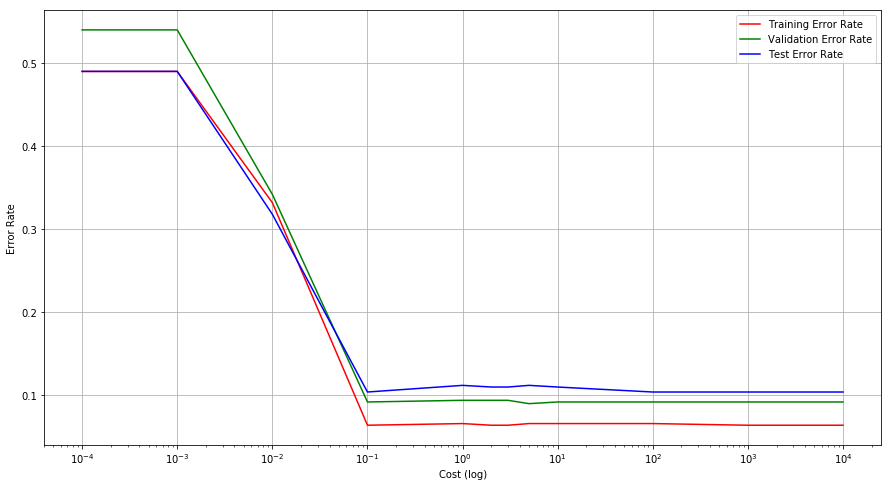

In [396]:
np.random.seed(1)
X_train, X_vald, y_train, y_vald = train_test_split(X, Y, test_size=0.5)

X1_test = np.random.uniform(0, 1, 500) - 0.5
X2_test = np.random.uniform(0, 1, 500) - 0.5
X_test = np.column_stack((X1_test,X2_test))

temp_test = X1_test-X2_test
y_test = [None] * len(temp_test)
# Assign class labels
for idx, j in enumerate(temp_test):
    if j > 0.1:
        y_test[idx] = 1
    elif j <  -0.1:
        y_test[idx] = 0
    else:
        y_test[idx] = np.random.uniform(0, 1) > 0.5
        
cost = [0.0001, 0.001, 0.01, 0.1, 1, 2, 3, 5, 10, 100, 1000, 10000]
cross_vald_error = {}
training_error = {}
test_error= {}

for c in cost:
    clf = svm.SVC(kernel='linear', C=c)
    clf.fit(X_train, y_train)
    p = clf.predict(X_train)
    training_error[c] = (len(X_train) - sum(y_train == p))/len(X_train)
    p = clf.predict(X_vald)
    cross_vald_error[c] = (len(X_vald) - sum(y_vald == p))/len(X_vald)
    p = clf.predict(X_test)
    test_error[c] = (len(X_test) - sum(y_test == p))/len(X_test)

lists = sorted(training_error.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111)

ax.set_xscale('log')
plt.plot(x, y, color='r', label="Training Error Rate")
ax.set_xlabel("Cost (log)")
ax.set_ylabel("Error Rate")

lists = sorted(cross_vald_error.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

ax.set_xscale('log')
plt.plot(x, y, color='g', label="Validation Error Rate")
ax.set_xlabel("Cost (log)")
ax.set_ylabel("Error Rate")

lists = sorted(test_error.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

ax.set_xscale('log')
plt.plot(x, y, color='b', label="Test Error Rate")
ax.set_xlabel("Cost (log)")
ax.set_ylabel("Error Rate")

plt.grid()
plt.legend()
plt.show()

Q7. In this problem, you will use support vector approaches in order to predict whether a given car gets high or low gas mileage based on the Auto data set.

(a) Create a binary variable that takes on a 1 for cars with gas mileage above the median, and a 0 for cars with gas mileage below the median.

In [399]:
import pandas as pd

auto = pd.read_csv("data/Auto.csv")
auto.dropna(inplace=True)
auto = auto[auto['horsepower'] != '?']
auto['horsepower'] = auto['horsepower'].astype(int)
auto['mpg01'] = np.where(auto['mpg']>=auto['mpg'].median(), 1, 0)
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,0
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,0
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,0
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,0
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,0


(b) Fit a support vector classifier to the data with various values of cost, in order to predict whether a car gets high or low gas mileage. Report the cross-validation errors associated with different values of this parameter. Comment on your results.

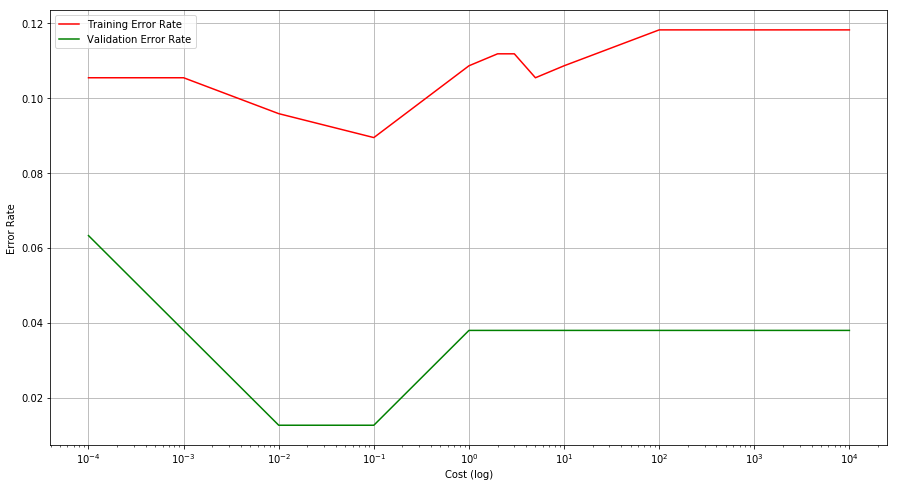

In [428]:
np.random.seed(1)
X= auto[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']]
Y = auto[['mpg01']]
X_train, X_vald, y_train, y_vald = train_test_split(X, Y, test_size=0.2)

cost = [0.0001, 0.001, 0.01, 0.1, 1, 2, 3, 5, 10, 100, 1000, 10000]
cross_vald_error = {}
training_error = {}

for c in cost:
    clf = svm.SVC(kernel='linear', C=c)
    clf.fit(X_train, y_train.values.ravel())
    p = clf.predict(X_train)
    training_error[c] = (len(p) - sum(y_train['mpg01'] == p))/len(p)
    p = clf.predict(X_vald)
    cross_vald_error[c] = (len(p) - sum(y_vald['mpg01'] == p))/len(p)

lists = sorted(training_error.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111)

ax.set_xscale('log')
plt.plot(x, y, color='r', label="Training Error Rate")
ax.set_xlabel("Cost (log)")
ax.set_ylabel("Error Rate")

lists = sorted(cross_vald_error.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

ax.set_xscale('log')
plt.plot(x, y, color='g', label="Validation Error Rate")
ax.set_xlabel("Cost (log)")
ax.set_ylabel("Error Rate")  

plt.grid()
plt.legend()
plt.show()

(c) Now repeat (b), this time using SVMs with radial and polynomial basis kernels, with different values of gamma and degree and cost. Comment on your results.

In [444]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

parameters = {'C':[0.01, 0.1, 5, 10, 100], 'gamma':[0.01, 0.1, 5, 10, 100]}
clf = GridSearchCV(SVC(random_state=1, kernel='rbf'), parameters, n_jobs=4, cv=10)
clf.fit(X=X_train, y=y_train.values.ravel())
clf.best_estimator_

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=1, shrinking=True,
  tol=0.001, verbose=False)

Q8. This problem involves the OJ data set which is part of the ISLR package.

(a) Create a training set containing a random sample of 800 observations, and a test set containing the remaining
observations.

In [446]:
np.random.seed(1)
oj = pd.read_csv("data/OJ.csv")
oj = oj.drop(['Unnamed: 0'], axis=1)
oj['Store7'] = oj['Store7'].map({'Yes': 1, 'No': 0})
X_train, X_test, y_train, y_test = train_test_split(oj.drop(['Purchase'], axis=1),
                                                    oj[['Purchase']], train_size=800)

/Users/amitrajan/Desktop/PythonVirtualEnv/Python3_VirtualEnv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


(b) Fit a support vector classifier to the training data using cost=0.01, with Purchase as the response and the other variables as predictors. Use the summary() function to produce summary statistics, and describe the results obtained.

In [454]:
clf = svm.SVC(kernel='linear', C=0.01)
print(clf.fit(X_train, y_train.values.ravel()))
print("Number of support vectors: " +str(len(clf.support_vectors_)))

SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Number of support vectors: 611


(c) What are the training and test error rates?

In [456]:
from sklearn.metrics import accuracy_score

print("Training Error rate is: " + str(1 - accuracy_score(clf.predict(X_train), y_train)))
print("Test Error rate is: " + str(1 - accuracy_score(clf.predict(X_test), y_test)))

Training Error rate is: 0.31000000000000005
Test Error rate is: 0.3592592592592593


(d) Use the tune() function to select an optimal cost. Consider values in the range 0.01 to 10.

In [458]:
parameters = {'C':[0.01, 0.05, 0.1, 0.5, 1, 2, 3, 5, 7, 8, 9, 10]}
clf = GridSearchCV(SVC(random_state=1, kernel='linear'), parameters, n_jobs=4, cv=10)
clf.fit(X=X_train, y=y_train.values.ravel())
clf.best_estimator_

SVC(C=7, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=1, shrinking=True,
  tol=0.001, verbose=False)

(e) Compute the training and test error rates using this new value for cost.

In [460]:
model = clf.best_estimator_
print("Training Error rate is: " + str(1 - accuracy_score(model.predict(X_train), y_train)))
print("Test Error rate is: " + str(1 - accuracy_score(model.predict(X_test), y_test)))

Training Error rate is: 0.16500000000000004
Test Error rate is: 0.16666666666666663


(f) Repeat parts (b) through (e) using a support vector machine with a radial kernel. Use the default value for gamma.

In [462]:
clf = GridSearchCV(SVC(random_state=1, kernel='rbf'), parameters, n_jobs=4, cv=10)
clf.fit(X=X_train, y=y_train.values.ravel())
print(clf.best_estimator_)
model = clf.best_estimator_
print("Training Error rate is: " + str(1 - accuracy_score(model.predict(X_train), y_train)))
print("Test Error rate is: " + str(1 - accuracy_score(model.predict(X_test), y_test)))

SVC(C=8, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=1, shrinking=True,
  tol=0.001, verbose=False)
Training Error rate is: 0.15500000000000003
Test Error rate is: 0.1777777777777778
